# Basic Information for dataset 


-->HOW MANY SAMPLES
-->AMD RELATED TO AGE FACTOR
-->AMD RELATED TO GENE FACTOR

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#from patsy import dmatrices
import patsy

In [44]:
#load the data 
df = pd.read_csv('meta_retina.csv')
dfn = pd.DataFrame()
dfn['age'] = df['age']
dfn['mgs_level'] = df['mgs_level']
df.head()

,r_id,sample_id,donor,unique_id,rnaseq_id,genotype_id,michigan_id,A69S_rs10490924,Y402H_rs1061170,os_od,...,rin,nandrop_rna_ng_per_ul,rna_500ng,water,library_prep_date,library_index,library_submitted_date,library_sequenced_date,library_prepper,postmortem_interval_hrs
0,1_2,1,08-1521,08-1521-1,R42015-419pf_08-1521-1-IR,1-08-1521_OD@68524,1-08-1521,G/T,C/T,OD,...,NaN,NaN,6.3,243.7,12/3/15,27,12/10/15,1/29/16,MRS,19.00
1,2_1,2,08-1404,08-1404-2,R42016-085pf_08-1404-2-IR,2-08-1404_OS@68525,2-08-1404,G/T,C/T,OS,...,7.6,NaN,2.1,247.9,3/3/16,1,3/8/16,3/8/16,RRP,22.77
2,3_1,3,08-1312,08-1312-3,R42016-086pf_08-1312-3-IR,3-08-1312_OS@68526,3-08-1312,T/T,T/T,OS,...,7.6,NaN,1.7,248.3,3/3/16,3,3/8/16,3/8/16,RRP,22.22
3,4_1,4,08-1448,08-1448-4,R42016-087pf_08-1448-4-IR,4-08-1448_OS@68527,4-08-1448,G/T,T/T,OS,...,6.5,NaN,2.5,247.5,3/3/16,8,3/8/16,3/8/16,RRP,23.93
4,5_1,5,08-1451,08-1451-5,R42016-088pf_08-1451-5-IR,5-08-1451_OS@68528,5-08-1451,G/T,T/T,OS,...,6.4,NaN,8.9,241.1,3/3/16,9,3/8/16,3/8/16,RRP,22.35


In [42]:
dfn = dfn.dropna() 
#dfn

# age_mgs_level related

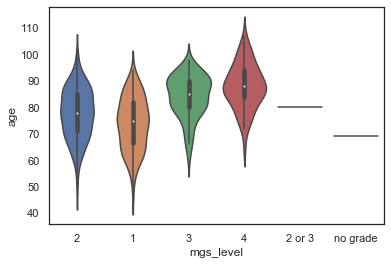

In [29]:
sns.set(color_codes = True)
sns.set_style("white")
sns.violinplot(x = dfn["mgs_level"], y = dfn["age"] )

#-->clean--remove 2or3 +no grage +nan(possible)

In [32]:
level = df['sample_id'].groupby(df['mgs_level'])
level.size()

mgs_level
1           127
2           197
2 or 3        1
3           126
4            67
no grade      1
Name: sample_id, dtype: int64

In [33]:
dfn[dfn['mgs_level'].isin(['NaN'])]

,age,mgs_level


In [34]:
t = list(dfn['mgs_level'])
#t
t.remove('2 or 3')
t.remove('no grade')
#t.remove('NA')

In [35]:
n = df[df['mgs_level'].isin(t)]
#n

In [36]:
l = n['sample_id'].groupby(n['mgs_level'])
l.size()

mgs_level
1    127
2    197
3    126
4     67
Name: sample_id, dtype: int64

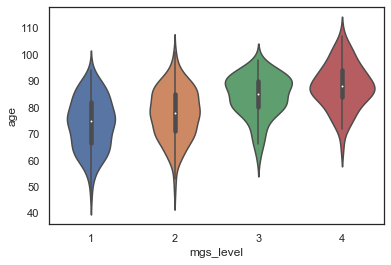

In [41]:
sns.set(color_codes = True)
sns.set_style("white")
fig = sns.violinplot(x = n["mgs_level"], y = n["age"])

fig.figure.savefig("violin.png",dpi = 300)


# How many samples

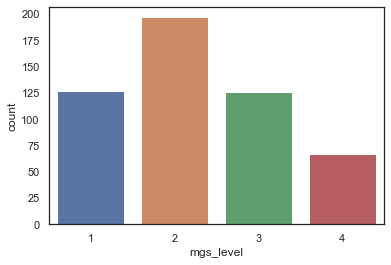

In [74]:
#dfn['mgs_level']= str(dfn['mgs_level'])
fig = sns.countplot(x = "mgs_level", data=n)
fig.figure.savefig("count.png",dpi = 300)
 
plt.show()

# List some genes for each patient to show tons of genes and need for pathway analysis

In [62]:
df = pd.read_csv('batchcorrected_log2cpm.tsv', sep='\t',index_col=0)
#df.set_index(df["Unnamed: 0"], inplace=True)
df.head()

,100_2,101_3,102_2,103_3,104_2,105_2,106_4,107_4,109_1,11_4,...,90_2,91_2,92_3,93_2,94_4,95_4,96_3,97_2,98_3,99_1
ENSG00000000003,4.224093,4.088110,4.108960,4.338494,4.144095,3.961678,4.068081,4.181222,4.177308,4.345819,...,4.095915,4.185599,3.984862,4.437899,4.258712,3.980472,4.310913,4.078538,4.171295,4.225876
ENSG00000000419,4.273573,4.278318,4.508365,4.533990,4.451600,4.437512,4.229555,4.359195,4.299986,4.569697,...,4.615619,4.413496,4.623100,4.781393,4.534774,4.570218,4.722600,4.492435,4.560072,4.415542
ENSG00000000457,4.716466,4.969749,4.852762,4.947713,4.882771,4.704028,4.675137,4.517319,4.740297,4.672500,...,4.700506,4.839435,4.763086,4.870351,4.876640,4.812464,4.812821,4.840323,4.880159,4.652706
ENSG00000000460,4.126170,4.528228,4.286024,4.310150,4.150902,4.265058,4.737984,4.102466,4.593532,4.613472,...,4.476497,4.568329,4.556887,4.323269,4.165587,4.667403,4.378113,4.334682,4.361387,3.685774
ENSG00000000938,1.171196,0.862429,1.540143,1.105556,1.375205,1.568452,1.638125,1.233508,1.497463,1.548793,...,1.454494,0.874062,1.199031,2.341509,1.732493,1.523060,1.136348,1.578141,0.897523,1.096682


In [64]:
df.reset_index(inplace = True)
df.head()

,index,100_2,101_3,102_2,103_3,104_2,105_2,106_4,107_4,109_1,...,90_2,91_2,92_3,93_2,94_4,95_4,96_3,97_2,98_3,99_1
0,ENSG00000000003,4.224093,4.088110,4.108960,4.338494,4.144095,3.961678,4.068081,4.181222,4.177308,...,4.095915,4.185599,3.984862,4.437899,4.258712,3.980472,4.310913,4.078538,4.171295,4.225876
1,ENSG00000000419,4.273573,4.278318,4.508365,4.533990,4.451600,4.437512,4.229555,4.359195,4.299986,...,4.615619,4.413496,4.623100,4.781393,4.534774,4.570218,4.722600,4.492435,4.560072,4.415542
2,ENSG00000000457,4.716466,4.969749,4.852762,4.947713,4.882771,4.704028,4.675137,4.517319,4.740297,...,4.700506,4.839435,4.763086,4.870351,4.876640,4.812464,4.812821,4.840323,4.880159,4.652706
3,ENSG00000000460,4.126170,4.528228,4.286024,4.310150,4.150902,4.265058,4.737984,4.102466,4.593532,...,4.476497,4.568329,4.556887,4.323269,4.165587,4.667403,4.378113,4.334682,4.361387,3.685774
4,ENSG00000000938,1.171196,0.862429,1.540143,1.105556,1.375205,1.568452,1.638125,1.233508,1.497463,...,1.454494,0.874062,1.199031,2.341509,1.732493,1.523060,1.136348,1.578141,0.897523,1.096682


In [80]:
df_slc= df.head(25)
df_slc.head()

,index,100_2,101_3,102_2,103_3,104_2,105_2,106_4,107_4,109_1,...,90_2,91_2,92_3,93_2,94_4,95_4,96_3,97_2,98_3,99_1
0,ENSG00000000003,4.224093,4.088110,4.108960,4.338494,4.144095,3.961678,4.068081,4.181222,4.177308,...,4.095915,4.185599,3.984862,4.437899,4.258712,3.980472,4.310913,4.078538,4.171295,4.225876
1,ENSG00000000419,4.273573,4.278318,4.508365,4.533990,4.451600,4.437512,4.229555,4.359195,4.299986,...,4.615619,4.413496,4.623100,4.781393,4.534774,4.570218,4.722600,4.492435,4.560072,4.415542
2,ENSG00000000457,4.716466,4.969749,4.852762,4.947713,4.882771,4.704028,4.675137,4.517319,4.740297,...,4.700506,4.839435,4.763086,4.870351,4.876640,4.812464,4.812821,4.840323,4.880159,4.652706
3,ENSG00000000460,4.126170,4.528228,4.286024,4.310150,4.150902,4.265058,4.737984,4.102466,4.593532,...,4.476497,4.568329,4.556887,4.323269,4.165587,4.667403,4.378113,4.334682,4.361387,3.685774
4,ENSG00000000938,1.171196,0.862429,1.540143,1.105556,1.375205,1.568452,1.638125,1.233508,1.497463,...,1.454494,0.874062,1.199031,2.341509,1.732493,1.523060,1.136348,1.578141,0.897523,1.096682


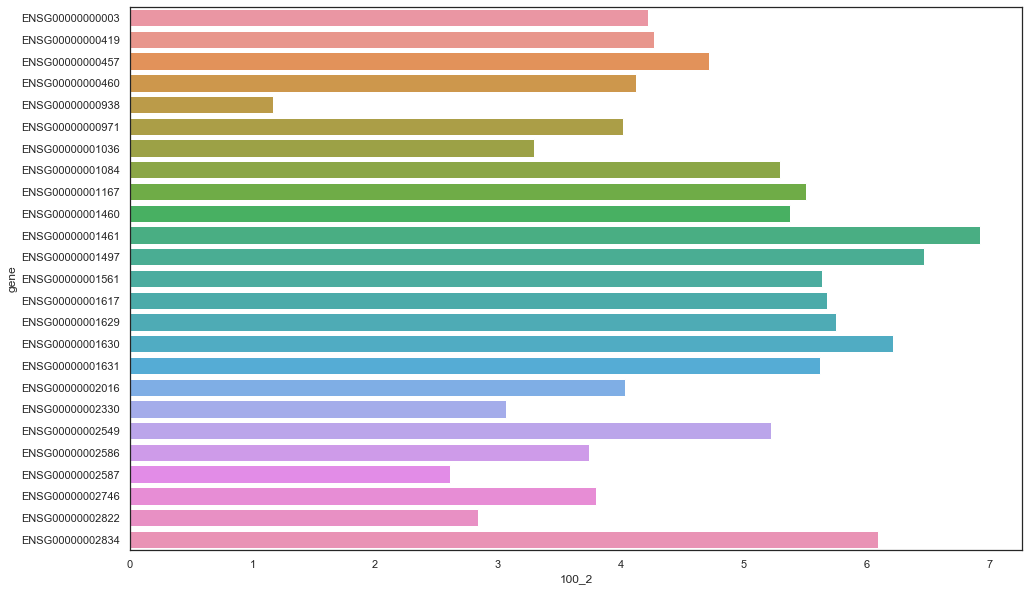

In [91]:
plt.figure(figsize = (16,10))
fig = sns.barplot(x="100_2", y="index", 
           
            data=df_slc)

plt.ylabel('gene')
fig.figure.savefig("gene_slc.png",dpi = 150)
plt.show()

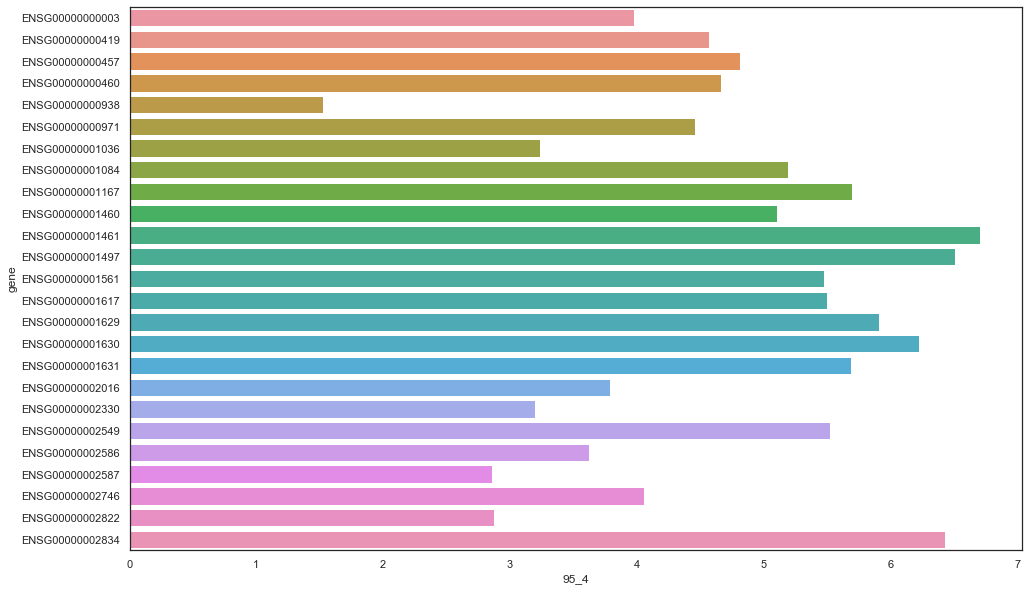

In [93]:
plt.figure(figsize = (16,10))
fig2 = sns.barplot(x="95_4", y="index", 
           
            data=df_slc)

plt.ylabel('gene')
fig2.figure.savefig("gene_slc_2.png",dpi = 150)
plt.show()

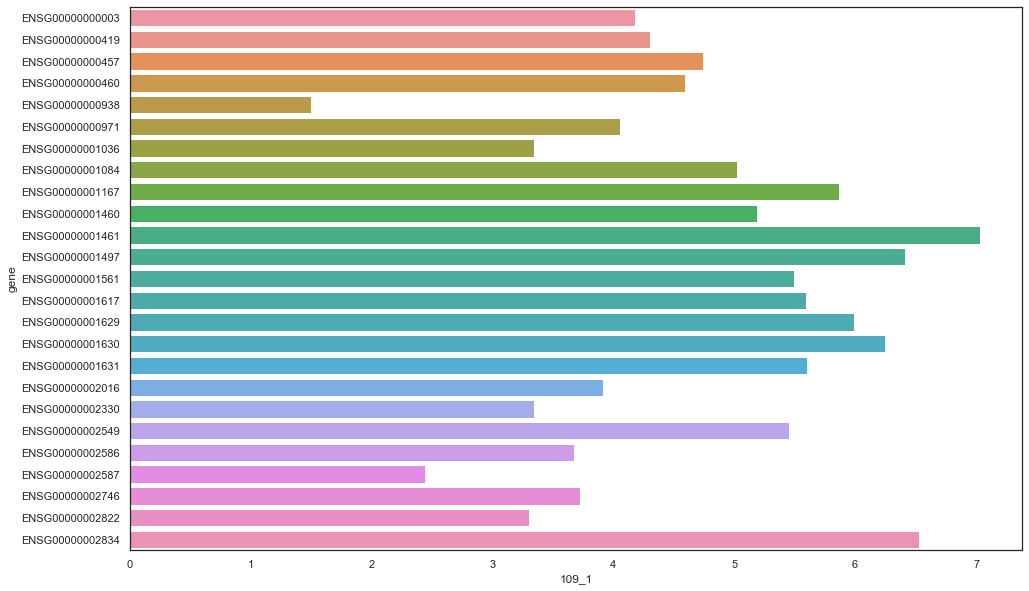

In [94]:
plt.figure(figsize = (16,10))
fig3 = sns.barplot(x="109_1", y="index", 
           
            data=df_slc)

plt.ylabel('gene')
fig3.figure.savefig("gene_slc_3.png",dpi = 150)
plt.show()

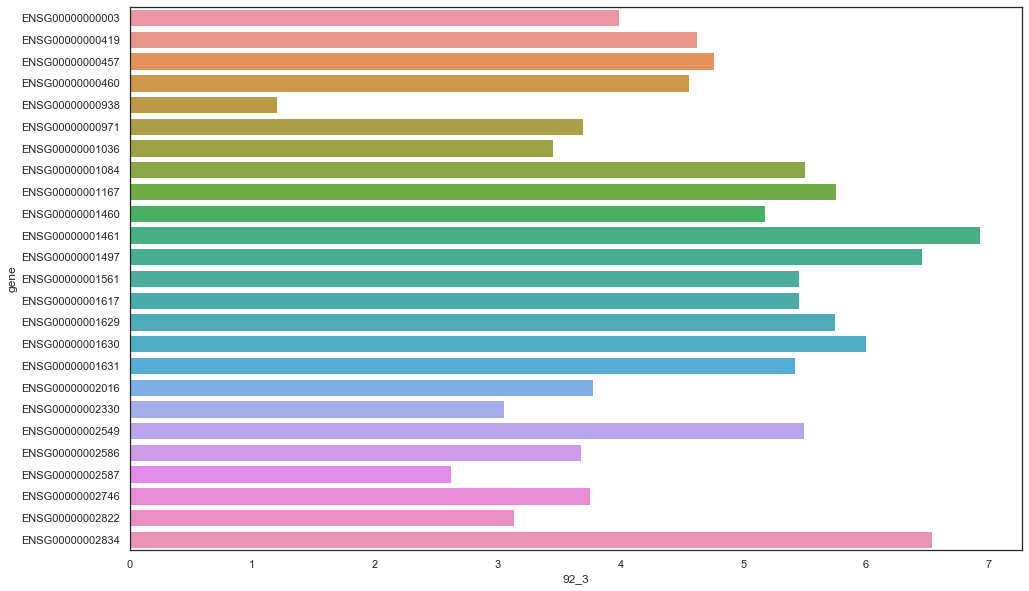

In [95]:
plt.figure(figsize = (16,10))
fig4 = sns.barplot(x="92_3", y="index", 
           
            data=df_slc)

plt.ylabel('gene')
fig4.figure.savefig("gene_slc_4.png",dpi = 150)
plt.show()